# Exploratory Data Analysis   
__The following exploration is done to analyze which of the 2 cab companies, Yellow Company or Pink Company, is the better choice to invest in.__     

The following features are present in the dataset:    
1. txnID (Transaction ID): Unique id assigned to each of the rides that were done by either of the companies     
2. custID (Customer ID): Unique id assigned to each customer. Note that values in this field can be repeated as the same customer could have taken multiple rides with both the companies   
3. date (Date of Ride): The day of each month that the ride took place on   
4. month (Month of Ride): The month in which the ride took place   
5. year (Year of Ride): The year in which the ride took place    
6. day_name (Day Name): Name of the day on which the ride took place    
7. distance (Distance): The length/distance of each ride   
8. city (City): City in which the ride took place   
9. state (State): State of the city in which the ride took place    
10. cost (Cost): Cost incurred by each company for each ride   
11. price (Price): Price charged by each company for each ride  
12. profit (Profit): Profit earned by the company on each ride (Price-Cost)   
13. population (Population): Population of the city in which the ride took place   
14. user (User): Number of cab users that the city has    
15. pay_mode (Mode of Payment): The mode of payment that the customer used to pay for the ride   
16. gender (Gender): The gender of the customer    
17. age (Age): Age of the customer   
18. monthly_income (Monthly Income): Monthly income of the customer in US Dollars     19.
19. company (Company): Which company undertook the ride   
20. Holiday (Holiday): The name of the holiday on the date of the ride    

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('Datasets/Master_Data.csv')
df.head()

,txnID,custID,date,month,year,day_name,distance,city,state,cost,price,profit,population,user,pay_mode,gender,age,monthly_income,company,Holiday
0,10000011,29290,7,January,2016,Thursday,30.45,ATLANTA,GA,313.635,370.95,57.315,814885,24701,Card,Male,28,10813,Pink Cab,NaN
1,10000012,27703,5,January,2016,Tuesday,28.62,ATLANTA,GA,334.854,358.52,23.666,814885,24701,Card,Male,27,9237,Pink Cab,NaN
2,10000013,28712,1,January,2016,Friday,9.04,ATLANTA,GA,97.632,125.20,27.568,814885,24701,Cash,Male,53,11242,Pink Cab,New Year's Day
3,10000014,28020,6,January,2016,Wednesday,33.17,ATLANTA,GA,351.602,377.40,25.798,814885,24701,Cash,Male,23,23327,Pink Cab,NaN
4,10000015,27182,2,January,2016,Saturday,8.73,ATLANTA,GA,97.776,114.62,16.844,814885,24701,Card,Male,33,8536,Pink Cab,NaN


### Hypotheses:   
1. Price has increased over the years   
2. Places with a higher population have higher prices and costs   
3. Profitability increases with larger duration    
4. Profit increases on Holidays    
5. People with higher income travel longer distances   
6. People in this age group travel more (22-40), due to absence of private modes of transport  

In [3]:
df = df.set_index('txnID')
df.describe()

,custID,date,year,distance,cost,price,profit,population,user,age,monthly_income
count,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,359392.000000,3.593920e+05,359392.000000,359392.000000,359392.000000
mean,23889.276623,15.608133,2017.045199,22.567254,286.190113,423.443311,137.253198,3.132198e+06,158365.582267,35.362109,15091.469465
std,21220.895588,8.825601,0.800239,12.233526,157.993661,274.378911,160.311840,3.315194e+06,100850.051020,12.589699,7988.860168
min,1.000000,1.000000,2016.000000,1.900000,19.000000,15.600000,-220.060000,2.489680e+05,3643.000000,18.000000,2000.000000
25%,3674.000000,8.000000,2016.000000,12.000000,151.200000,206.437500,28.012000,6.712380e+05,80021.000000,25.000000,8387.000000
50%,17080.000000,16.000000,2017.000000,22.440000,282.480000,386.360000,81.962000,1.595037e+06,144132.000000,33.000000,14763.500000
75%,43945.000000,23.000000,2018.000000,32.960000,413.683200,583.660000,190.030000,8.405837e+06,302149.000000,42.000000,21085.000000
max,60000.000000,31.000000,2018.000000,48.000000,691.200000,2048.030000,1463.966000,8.405837e+06,302149.000000,65.000000,35000.000000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 359392 entries, 10000011 to 10440107
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   custID          359392 non-null  int64  
 1   date            359392 non-null  int64  
 2   month           359392 non-null  object 
 3   year            359392 non-null  int64  
 4   day_name        359392 non-null  object 
 5   distance        359392 non-null  float64
 6   city            359392 non-null  object 
 7   state           359392 non-null  object 
 8   cost            359392 non-null  float64
 9   price           359392 non-null  float64
 10  profit          359392 non-null  float64
 11  population      359392 non-null  int64  
 12  user            359392 non-null  int64  
 13  pay_mode        359392 non-null  object 
 14  gender          359392 non-null  object 
 15  age             359392 non-null  int64  
 16  monthly_income  359392 non-null  int64  
 17  c

Here, we see that the Holiday feature has only 10906 not-null rows. While this might seem to be bad, it is useful information as it shows us that the ride took place on a day that wasn't a Federal US Holiday.

In [5]:
df.corr()

,custID,date,year,distance,cost,price,profit,population,user,age,monthly_income
custID,1.000000,0.019101,-0.005484,-0.000542,-0.001660,-0.005535,-0.007838,-0.003985,-0.003920,-0.002870,-0.006665
date,0.019101,1.000000,-0.017993,0.001653,0.002071,-0.004563,-0.009851,0.001253,0.000734,0.002069,-0.001803
year,-0.005484,-0.017993,1.000000,-0.001072,-0.001773,-0.036409,-0.060567,0.000003,-0.000771,-0.001416,0.000118
distance,-0.000542,0.001653,-0.001072,1.000000,0.981848,0.835753,0.462768,-0.002311,-0.000428,0.001411,0.002254
cost,-0.001660,0.002071,-0.001773,0.981848,1.000000,0.859812,0.486056,0.015108,0.023628,0.001596,0.002634
price,-0.005535,-0.004563,-0.036409,0.835753,0.859812,1.000000,0.864154,0.326589,0.281061,0.002324,0.003890
profit,-0.007838,-0.009851,-0.060567,0.462768,0.486056,0.864154,1.000000,0.544079,0.457758,0.002405,0.004062
population,-0.003985,0.001253,0.000003,-0.002311,0.015108,0.326589,0.544079,1.000000,0.915490,0.000697,0.002127
user,-0.003920,0.000734,-0.000771,-0.000428,0.023628,0.281061,0.457758,0.915490,1.000000,0.000681,0.003231
age,-0.002870,0.002069,-0.001416,0.001411,0.001596,0.002324,0.002405,0.000697,0.000681,1.000000,-0.000158


2017    128510
2018    123563
2016    107319
Name: year, dtype: int64


<AxesSubplot:xlabel='count', ylabel='year'>

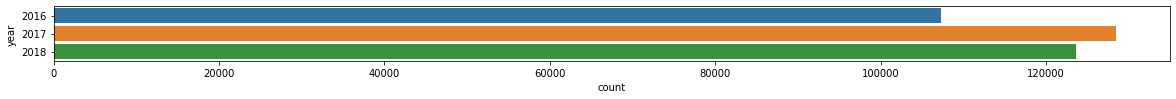

In [6]:
fig = plt.figure(figsize=(20,1))
print(df.year.value_counts())
sns.countplot(y=df.year, data=df)

In [7]:
profit_by_year = df.groupby('year').profit.mean()
profit_by_year_df = pd.DataFrame(profit_by_year.values)
profit_by_year_df['year'] = profit_by_year.index
profit_by_year_df.columns = ['profit', 'year']
profit_by_year_df = profit_by_year_df[['year','profit']]
profit_by_year_df

,year,profit
0,2016,145.738468
1,2017,144.810776
2,2018,122.023275


year
2016    145.738468
2017    144.810776
2018    122.023275
Name: profit, dtype: float64


<AxesSubplot:xlabel='year', ylabel='profit'>

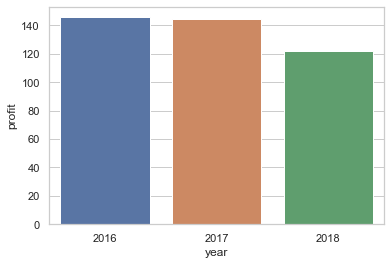

In [8]:
sns.set_theme(style='whitegrid')
print(profit_by_year)
sns.barplot(x='year', y='profit', data = profit_by_year_df)